# Exercise 2: <br> Measure the distance to a galaxy using the previously calibrated Cepheid Period-Luminosity relation

In this exercise, we use the Period-Luminosity relation calibrated previously in the Milky Way using Gaia parallaxes and HST apparent magnitudes (see Notebook 1) to measure the distance to a SNIa host galaxy. We need: <br>
- the slope and intercept of the absolute Period-Luminosity Relation <br>
- periods and apparent magnitudes of Cepheids in the SNIa host galaxy 

We import packages:

In [29]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import astropy.units as u
from uncertainties import unumpy as unp
from uncertainties import ufloat

Type here the path where you placed the notebook and data files:

In [30]:
path_data = '/Users/louise/Desktop/2025-04-24_CosmoVerse_Lecture_Cepheids/Tutorials/'

Now, we read the data file with Cepheid information from Riess et al. (2022) (https://ui.adsabs.harvard.edu/abs/2022ApJ...934L...7R/abstract), which contains periods and apparent magnitudes for Cepheids in many SNIa galaxies. Columns are: <br> 
- Galaxy name, <br> 
- RA and DEC, <br> 
- Cepheid, <br> 
- period, <br> 
- color (F555W-F814W) and uncertainty, <br> 
- F160W magnitude and uncertainty, <br> 
- metallicity (O/H), <br> 
- Additional note. 

In [31]:
R22 = pd.read_csv(path_data + 'Riess2022_tab2.dat', sep='\s+', header=0) 

We select only the galaxy we want to study (here N3447):

In [32]:
name_galaxy = 'N3447'
R22 = R22[R22['galaxy'] == name_galaxy]

In this exercise we measure the Cepheid Period-Luminosity relation in the same set of HST filters as in the previous exercise (F160W corrected from a color term): <br> 

<b> mHW = F160W - 0.386 * (F555W - F814W) </b> <br> 

We define a list of logP and apparent magnitudes "app_mag" with their errors for this Cepheid sample.

In [33]:
logP = [np.log10(x) for x in R22['period']]
F160W, eF160W = list(R22['F160W']), list(R22['eF160W'])
color, ecolor = list(R22['color']), list(R22['e_color'])

app_mag   = [F160W[i] - 0.386*color[i] for i in range(len(R22))]
e_app_mag = [ np.sqrt(eF160W[i]**2 + (0.386*ecolor[i])**2) for i in range(len(R22))]

We now plot the apparent magnitudes versus logP to inspect the Period-Luminosity relation in N3447. We set the slope to the same value obtained in exercise 1 in the Milky Way, and fit the intercept of the Period-Luminosity relation in this distant galaxy:

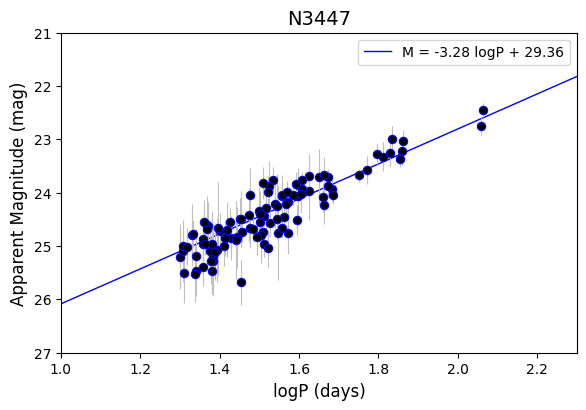

In [ ]:
fixed_slope = -3.28
xfine = np.linspace(0.2, 2.4, 100) 


popt, pcov = curve_fit(lambda X, B: fixed_slope*X+B, logP, app_mag, sigma=e_app_mag)
intercept = popt[0]
e_intercept = np.sqrt(np.diag(pcov))[0]


plt.figure(figsize=(6,4))
plt.subplots_adjust(left=0.10, right=0.96, top=0.92, bottom=0.12, hspace=0.1, wspace=0.3)

plt.plot(xfine, fixed_slope*xfine + intercept, '-b', linewidth=1, 
         label=f'M = {fixed_slope:.2f} logP + {intercept:.2f}')

plt.errorbar(logP, app_mag, yerr=e_app_mag, fmt='o', color='blue', markerfacecolor='k', 
             markeredgewidth=0.8, markersize=6, capsize=0, ecolor='silver', elinewidth=0.8)

plt.legend()
plt.xlabel('logP (days)', fontsize=12)
plt.ylabel('Apparent Magnitude (mag)', fontsize=12)
plt.xlim(1.0, 2.3)
plt.ylim(21, 27)
plt.gca().invert_yaxis()
plt.title(name_galaxy, fontsize=14)
plt.show()

Finally, we can measure the distance modulus ($\mu$) of this galaxy, compared to the Milky Way calibration: <br> 

Absolute calibration in the Milky Way:  
<b> M = slope * logP + intercept_MW </b> <br> <br>

Apparent magnitude Period-Luminosity relation in the N3447 galaxy: <br> 
<b> mHW = slope * logP + intercept_galaxy </b> <br> <br>

M = mHW - 5*log d (kpc) - 10  <br>

<b> d = 10 ^ [ (mHW -10 -M)/5 ] </b>



In [46]:
dist_kpc = 10 ** ((intercept -10 +2.65)/5)
distance_modulus = intercept +2.65

print(f'Distance = {dist_kpc/1000:.3f} Mpc')
print(f'Distance modulus = {distance_modulus:.3f} mag')

Distance = 25.281 Mpc
Distance modulus = 32.014 mag
